In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from ste import STE

In [2]:
# Set default setting for the figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 12) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 12) # fontsize of the tick labels
plt.rc("ytick", labelsize = 12) # fontsize of the tick labels
plt.rc("legend", fontsize = 12) # legend fontsize

In [3]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../packages/")
from TsIP.TsIP import TsIP

# Time series dataset

In [4]:
# Define the country name.
COUNTRY = "Cameroon"

In [5]:
# Load the time series.
df = pd.read_csv(f"../Dataset time-series/output_data/{COUNTRY}/{COUNTRY}.csv", header = [0, 1], index_col = 0)
# Not consider some indicators.
df.drop(["Code", "Ramadan", "Population", "Area", "Lon", "Lat", "Waterways"], axis = 1, level = "Indicator", inplace = True)
df.index.name = "Datetime"
df.index = pd.to_datetime(df.index)
freq = "D"
df.index.freq = freq
df.head()

AdminStrata                       Adamawa                                     \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%) FCG   
Datetime                                                                       
2018-01-01                            NaN                            NaN NaN   
2018-01-02                            NaN                            NaN NaN   
2018-01-03                            NaN                            NaN NaN   
2018-01-04                            NaN                            NaN NaN   
2018-01-05                            NaN                            NaN NaN   

AdminStrata                                                   \
Indicator   Fatalities NDVI NDVI Anomaly Rainfalls (mm) rCSI   
Datetime                                                       
2018-01-01         NaN  NaN          NaN            NaN  NaN   
2018-01-02         NaN  NaN          NaN            NaN  NaN   
2018-01-03         NaN  NaN          NaN            NaN  NaN   
2018-01-04         NaN  NaN          NaN            NaN  NaN   
2018-01-05         NaN  NaN          NaN            NaN  NaN   

AdminStrata                       Central                                 ...  \
Indicator   1 Month Anomaly Rainfalls (%) 3 Months Anomaly Rainfalls (%)  ...   
Datetime                                                                  ...   
2018-01-01                            NaN                            NaN  ...   
2018-01-02                            NaN                            NaN  ...   
2018-01-03                            NaN                            NaN  ...   
2018-01-04                            NaN                            NaN  ...   
2018-01-05                            NaN                            NaN  ...   

AdminStrata     South-West                               West  \
Indicator   Rainfalls (mm) rCSI 1 Month Anomaly Rainfalls (%)   
Datetime                                                        
2018-01-01             NaN  NaN                           NaN   
2018-01-02             NaN  NaN                           NaN   
2018-01-03             NaN  NaN                           NaN   
2018-01-04             NaN  NaN                           NaN   
2018-01-05             NaN  NaN                           NaN   

AdminStrata                                                                  \
Indicator   3 Months Anomaly Rainfalls (%) FCG Fatalities NDVI NDVI Anomaly   
Datetime                                                                      
2018-01-01                             NaN NaN        NaN  NaN          NaN   
2018-01-02                             NaN NaN        NaN  NaN          NaN   
2018-01-03                             NaN NaN        NaN  NaN          NaN   
2018-01-04                             NaN NaN        NaN  NaN          NaN   
2018-01-05                             NaN NaN        NaN  NaN          NaN   

AdminStrata                      
Indicator   Rainfalls (mm) rCSI  
Datetime                         
2018-01-01             NaN  NaN  
2018-01-02             NaN  NaN  
2018-01-03             NaN  NaN  
2018-01-04             NaN  NaN  
2018-01-05             NaN  NaN  

[5 rows x 80 columns]

In [6]:
len(df)

1827

In [7]:
PROVINCES = df.columns.get_level_values("AdminStrata").unique()
PROVINCES

Index(['Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North',
       'North-West', 'South', 'South-West', 'West'],
      dtype='object', name='AdminStrata')

In [8]:
INDICATORS = df.columns.get_level_values("Indicator").unique()
INDICATORS

Index(['1 Month Anomaly Rainfalls (%)', '3 Months Anomaly Rainfalls (%)',
       'FCG', 'Fatalities', 'NDVI', 'NDVI Anomaly', 'Rainfalls (mm)', 'rCSI'],
      dtype='object', name='Indicator')

In [9]:
INDICATORS_TO_CONSIDER = ["FCG", "Fatalities", "rCSI"] 

df = df.loc[:, df.columns.get_level_values("Indicator").isin(INDICATORS_TO_CONSIDER)]
df.dropna(inplace = True)
df.head()

AdminStrata   Adamawa                        Central                       \
Indicator         FCG Fatalities      rCSI       FCG Fatalities      rCSI   
Datetime                                                                    
2019-06-30   26.79795        0.0  16.43836  19.64846        1.0  12.42938   
2019-07-01   27.08333        0.0  17.00000  19.14373        1.0  12.11009   
2019-07-02   25.39063        0.0  15.93750  18.46608        1.0  11.68142   
2019-07-03   24.86611        0.0  15.60826  18.09249        1.0  11.44509   
2019-07-04   24.41773        0.0  15.32682  18.52908        1.0  11.97263   

AdminStrata      East                      Far-North  ... North-West  \
Indicator         FCG Fatalities      rCSI       FCG  ...       rCSI   
Datetime                                              ...              
2019-06-30   19.17930        0.0  14.27297  16.05136  ...   55.54340   
2019-07-01   22.09802        0.0  13.75752  15.61280  ...   54.32856   
2019-07-02   20.75929        0.0  12.92407  14.91424  ...   55.29664   
2019-07-03   19.79969        0.0  12.32666  14.56664  ...   55.86234   
2019-07-04   19.20777        0.0  11.95815  14.20455  ...   55.52904   

AdminStrata     South                      South-West                       \
Indicator         FCG Fatalities      rCSI        FCG Fatalities      rCSI   
Datetime                                                                     
2019-06-30   19.98382        0.0  10.92233   49.43560       17.0  57.68452   
2019-07-01   19.55661        0.0  10.68884   49.05338       18.0  56.56940   
2019-07-02   18.66969        0.0  10.20408   50.59499       19.0  57.57078   
2019-07-03   18.05556        0.0   9.86842   51.40874       19.0  54.00416   
2019-07-04   20.09979        0.0   9.62224   51.34353       19.0  54.08571   

AdminStrata      West                       
Indicator         FCG Fatalities      rCSI  
Datetime                                    
2019-06-30   39.07455        1.0  20.90831  
2019-07-01   37.46919        1.0  20.04930  
2019-07-02   37.77065        1.0  19.56696  
2019-07-03   38.15074        1.0  20.51282  
2019-07-04   37.79831        1.0  20.32333  

[5 rows x 30 columns]

In [10]:
# Plot time-series.
TsIP(df).interactive_plot_df(title = "Time-series", matplotlib = False, style = "lines", comparison = False, normalization = True)

interactive(children=(ToggleButtons(description='AdminStrata', options=('Adamawa', 'Central', 'East', 'Far-Nor…

## Compute the entropy rate

In [11]:
# Compute the entropy rate of the endogenous indicators (FCS indicator).
ks = 20

def compute_entropy_rate(serie):
    y = list()
    for k in range(ks):
        result = STE.entropy_rate(serie, m = 3, k = k+1, h = 1)
        y.append(result)  
    return y  

tqdm.pandas()
df_Y = df.xs("FCG", axis = 1, level = 1, drop_level = True).progress_apply(compute_entropy_rate)
df_Y.index = df_Y.index  + 1
df_Y.head()

AdminStrata,Adamawa,Central,East,Far-North,Littoral,North,North-West,South,South-West,West
1,1.381652,1.359791,1.333805,1.403154,1.393516,1.400119,1.459151,1.189530,1.431175,1.377235
2,1.353583,1.313417,1.304467,1.375349,1.360004,1.385197,1.435444,1.127436,1.405844,1.361777
3,1.301431,1.237185,1.245911,1.320541,1.296188,1.334215,1.367328,1.062890,1.343307,1.300151
4,1.167971,1.116889,1.091234,1.153619,1.156088,1.177735,1.210123,0.914568,1.177797,1.150990
5,0.898159,0.898910,0.874215,0.877150,0.903662,0.906276,0.903950,0.701823,0.915467,0.863283


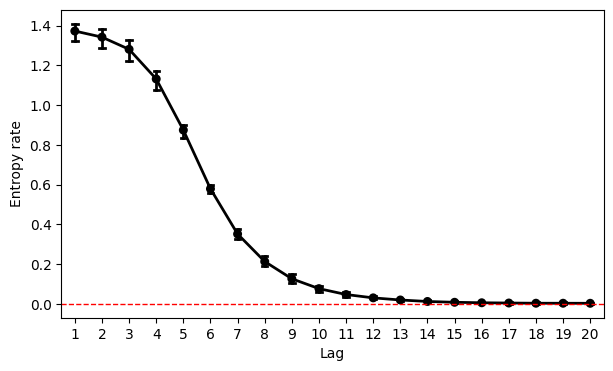

In [12]:
fig, ax = plt.subplots(figsize = (7, 4))
sns.set_context("notebook", font_scale = 1.2, rc = {"lines.linewidth": 1.1})
g = sns.pointplot(x = "index", y = "value", data = df_Y.melt(ignore_index = False).reset_index(),
                  color = "k", estimator = np.mean, capsize = .2, linewidth = 5.5, ax = ax)
plt.axhline(y = 0, ls = "--", color = "r", linewidth = 1)
ax.set_xlabel("Lag")
ax.set_ylabel("Entropy rate")

# Save the figure.
fig.savefig(f"./output/images/Entropy_rate_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

## Compute the STE

In [13]:
np.random.seed(42)

max_deltas = 20

def compute_STE(serie):
    adminstrata, indicator = serie.name
    x = serie.values.ravel().copy()
    y = df[adminstrata]["FCG"].values.ravel().copy()
    
    deltas = list()
    for delta in range(max_deltas):
        # Compute STE.
        original_STE = STE.calc_ste(x, y, m = 3, h = delta+1) 
        # Compute value of STE from X (shuffled 30 times) to Y.
        shuffle_STE = list()
        for i in range(30):
            x_shuffle = x.copy()
            np.random.shuffle(x_shuffle)
            shuffle_STE.append(STE.calc_ste(x_shuffle, y, m = 3, h = delta+1))  
        shuffle_STE = np.mean(shuffle_STE)
        # Compute effective STE.
        effective_STE = original_STE - shuffle_STE
        # Compute relative explanation added.
        REA = (original_STE - shuffle_STE) / STE.entropy_rate(y, m = 3, h = delta+1)
        # Append results.
        deltas.append([original_STE, shuffle_STE, effective_STE, REA])
        
    deltas = pd.DataFrame(deltas, columns = ["original_STE", "shuffle_STE", "effective_STE", "REA"]) 
    deltas.index = deltas.index + 1   
    deltas.index.name = "Delta"
    return deltas 

tqdm.pandas()
df_STE_deltas = df.groupby(axis = 1, level = ["AdminStrata", "Indicator"]).progress_apply(compute_STE)
df_STE_deltas.drop("FCG", axis = 1, level = "Indicator", inplace = True)
# Save results.
df_STE_deltas.to_csv(f"./output/STE_{COUNTRY}.csv")
df_STE_deltas.head()

AdminStrata      Adamawa                                                   \
Indicator     Fatalities                                             rCSI   
            original_STE shuffle_STE effective_STE       REA original_STE   
Delta                                                                       
1               0.003048    0.037892     -0.034844 -0.025219     0.043573   
2               0.006465    0.093936     -0.087470 -0.037046     0.143217   
3               0.009961    0.095618     -0.085657 -0.036214     0.125551   
4               0.011724    0.093555     -0.081831 -0.034615     0.107412   
5               0.007239    0.097679     -0.090441 -0.038395     0.135999   

AdminStrata                                          Central              ...  \
Indicator                                         Fatalities              ...   
            shuffle_STE effective_STE       REA original_STE shuffle_STE  ...   
Delta                                                                     ...   
1              0.043731     -0.000158 -0.000114     0.008794    0.042707  ...   
2              0.117548      0.025669  0.010872     0.029271    0.121884  ...   
3              0.120158      0.005393  0.002280     0.040818    0.117265  ...   
4              0.117671     -0.010259 -0.004339     0.036157    0.117613  ...   
5              0.117587      0.018412  0.007816     0.031167    0.121108  ...   

AdminStrata    South-West                   West                            \
Indicator            rCSI             Fatalities                             
            effective_STE       REA original_STE shuffle_STE effective_STE   
Delta                                                                        
1               -0.007987 -0.005581     0.023529    0.046730     -0.023201   
2                0.022761  0.009339     0.049365    0.120974     -0.071609   
3                0.003623  0.001495     0.054266    0.119481     -0.065215   
4               -0.007273 -0.002991     0.047188    0.117968     -0.070780   
5               -0.006721 -0.002763     0.043130    0.113856     -0.070726   

AdminStrata                                                             
Indicator                     rCSI                                      
                  REA original_STE shuffle_STE effective_STE       REA  
Delta                                                                   
1           -0.016846     0.060074    0.045881      0.014193  0.010306  
2           -0.030371     0.130019    0.116900      0.013118  0.005564  
3           -0.027651     0.119290    0.121839     -0.002549 -0.001081  
4           -0.030017     0.143773    0.120896      0.022877  0.009702  
5           -0.030175     0.124804    0.120449      0.004355  0.001858  

[5 rows x 80 columns]

In [14]:
df_STE_deltas = pd.read_csv(f"./output/STE_{COUNTRY}.csv", index_col = 0, header = [0, 1, 2])
df_STE_deltas.head()

AdminStrata      Adamawa                                                   \
Indicator     Fatalities                                             rCSI   
            original_STE shuffle_STE effective_STE       REA original_STE   
Delta                                                                       
1               0.003048    0.037892     -0.034844 -0.025219     0.043573   
2               0.006465    0.093936     -0.087470 -0.037046     0.143217   
3               0.009961    0.095618     -0.085657 -0.036214     0.125551   
4               0.011724    0.093555     -0.081831 -0.034615     0.107412   
5               0.007239    0.097679     -0.090441 -0.038395     0.135999   

AdminStrata                                          Central              ...  \
Indicator                                         Fatalities              ...   
            shuffle_STE effective_STE       REA original_STE shuffle_STE  ...   
Delta                                                                     ...   
1              0.043731     -0.000158 -0.000114     0.008794    0.042707  ...   
2              0.117548      0.025669  0.010872     0.029271    0.121884  ...   
3              0.120158      0.005393  0.002280     0.040818    0.117265  ...   
4              0.117671     -0.010259 -0.004339     0.036157    0.117613  ...   
5              0.117587      0.018412  0.007816     0.031167    0.121108  ...   

AdminStrata    South-West                   West                            \
Indicator            rCSI             Fatalities                             
            effective_STE       REA original_STE shuffle_STE effective_STE   
Delta                                                                        
1               -0.007987 -0.005581     0.023529    0.046730     -0.023201   
2                0.022761  0.009339     0.049365    0.120974     -0.071609   
3                0.003623  0.001495     0.054266    0.119481     -0.065215   
4               -0.007273 -0.002991     0.047188    0.117968     -0.070780   
5               -0.006721 -0.002763     0.043130    0.113856     -0.070726   

AdminStrata                                                             
Indicator                     rCSI                                      
                  REA original_STE shuffle_STE effective_STE       REA  
Delta                                                                   
1           -0.016846     0.060074    0.045881      0.014193  0.010306  
2           -0.030371     0.130019    0.116900      0.013118  0.005564  
3           -0.027651     0.119290    0.121839     -0.002549 -0.001081  
4           -0.030017     0.143773    0.120896      0.022877  0.009702  
5           -0.030175     0.124804    0.120449      0.004355  0.001858  

[5 rows x 80 columns]

In [15]:
def compute_importance(x):
    idx = x.xs("REA", axis = 1, level = 2).idxmax()
    return x.xs("REA", axis = 1, level = 2).loc[idx].values.ravel()[0]
    
T_fcs = df_STE_deltas.groupby(axis = 1, level = ["AdminStrata", "Indicator"], group_keys = False).apply(compute_importance).unstack("Indicator")

In [16]:
T_fcs_perc = T_fcs*100
T_fcs_perc[T_fcs_perc < 0] = 0

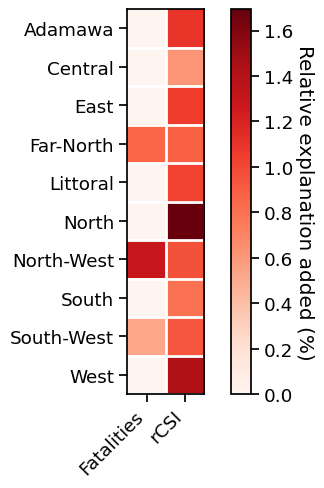

In [17]:
fig, ax = plt.subplots(figsize = (7, 5))
im = ax.imshow(T_fcs_perc, cmap = "Reds")
cbar = fig.colorbar(im, ax = ax)
cbar.set_label("Relative explanation added (%)", rotation = 270, labelpad = 15)

ax.set_xticks(range(len(T_fcs_perc.columns)))
ax.set_yticks(range(len(T_fcs_perc.index)))
ax.set_xticklabels(T_fcs.columns, rotation = 45)
ax.set_yticklabels(T_fcs.index)

for i in range(T_fcs_perc.shape[0]):
    ax.axhline(i + 0.5, color = "white", lw = 2)
for i in range(T_fcs_perc.shape[1]):
    ax.axvline(i + 0.5, color = "white", lw = 2)

plt.xticks(rotation = 45, ha = "right");

# Save the figure.
fig.savefig(f"./output/images/Importance_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)

In [18]:
lags = df_STE_deltas.xs("REA", axis = 1, level = 2)

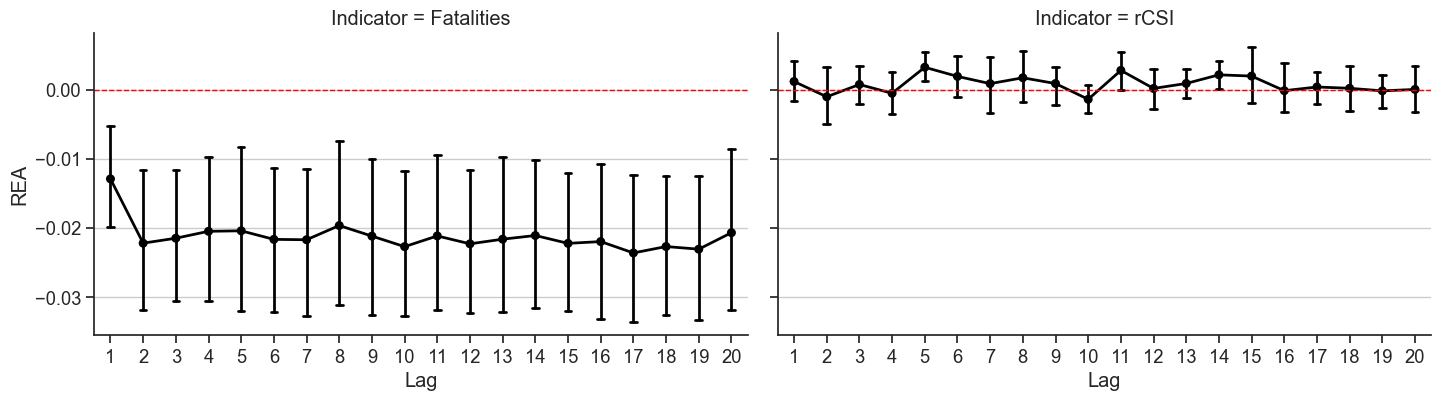

In [19]:
sns.set_style("ticks", {"axes.grid" : True})
sns.set_context("notebook", font_scale = 1.2, rc = {"lines.linewidth": 1.1})
g = sns.catplot(x = "Delta", y = "value", col = "Indicator",
                data = lags.melt(ignore_index = False).reset_index(), 
                kind = "point",
                color = "k",
                estimator = np.mean,
                capsize = .2,
                height = 4,
                aspect = 1.8,
                col_wrap = 2)
g.map(plt.axhline, y = 0, ls = "--", color = "r", linewidth = 1)
g.set_xlabels("Lag")
g.set_ylabels("REA")

# Save the figure.
g.savefig(f"./output/images/REA_{COUNTRY}.png", bbox_inches = "tight", dpi = 300)